In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df= pd.read_csv("https://www.dropbox.com/s/ltksjtb54wrov5q/HeartDisease.csv?dl=1")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


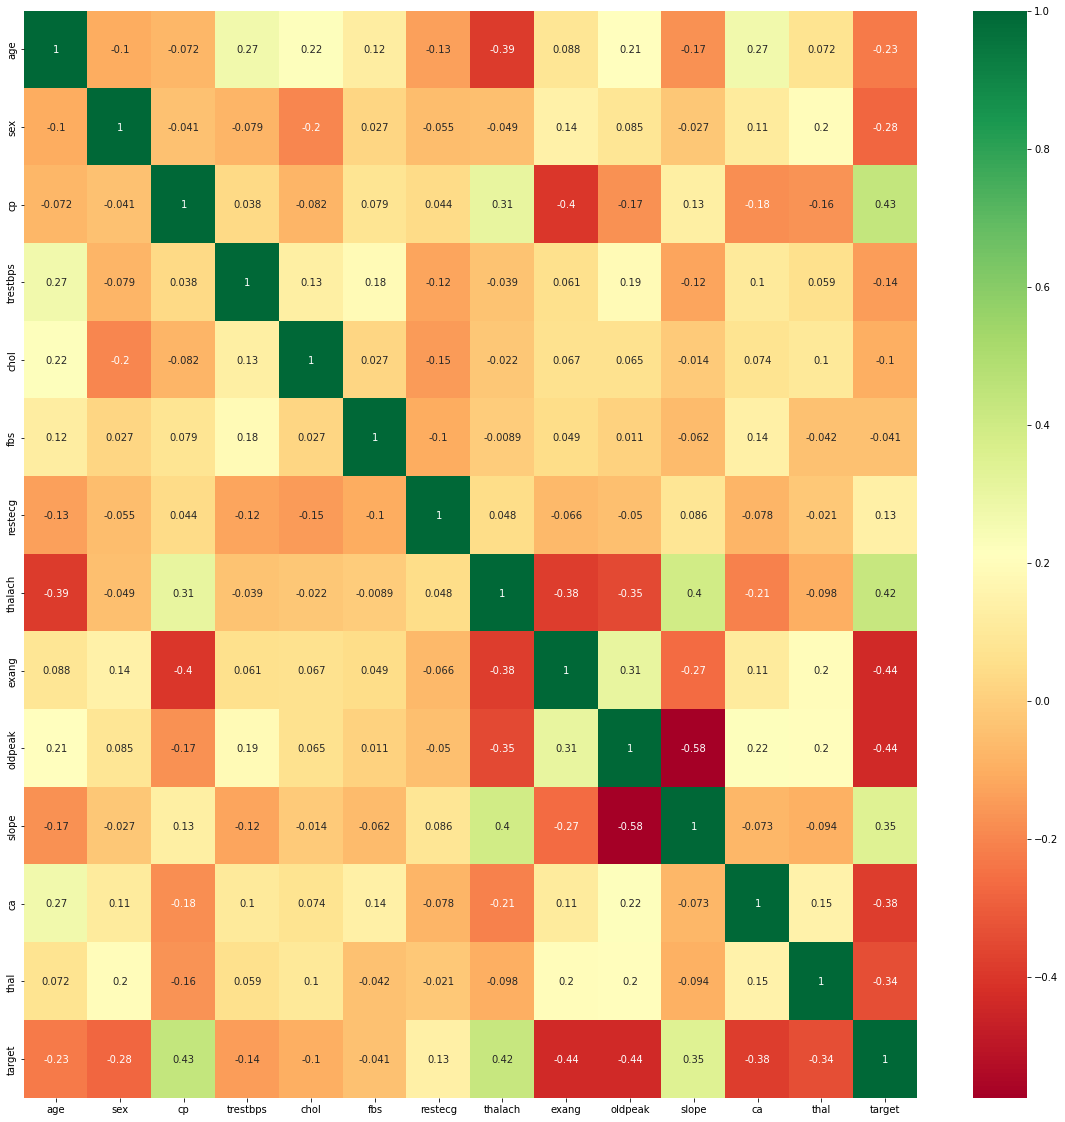

In [6]:
import seaborn as sns
#getting the correlation of each feature
corre = df.corr()
top_corr_features = corre.index
plt.figure(figsize=(20,20))
#heat map
z=sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9427242190>,
      dtype=object)

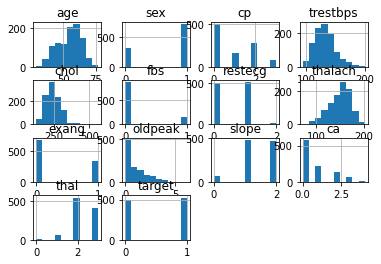

In [7]:
df.hist()

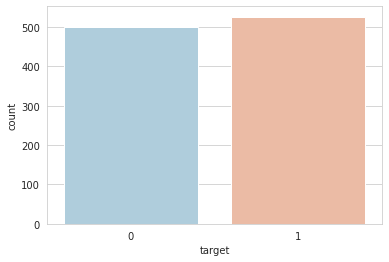

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='target', data= df, palette='RdBu_r')

In [9]:
dataset= pd.get_dummies(df, columns= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler= StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale]= StandardScaler.fit_transform(dataset[columns_to_scale])

In [11]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [12]:
y=dataset['target']
x=dataset.drop(['target'], axis =1)

In [13]:
from sklearn.model_selection import cross_val_score
knn_scores= []
for k in range(1,21):
  knn_classifier = KNeighborsClassifier(n_neighbors= k)
  score= cross_val_score(knn_classifier, x, y, cv=10)
  knn_scores.append(score.mean())

Text(0.5, 1.0, 'k neighbour Classifier scores for different k values')

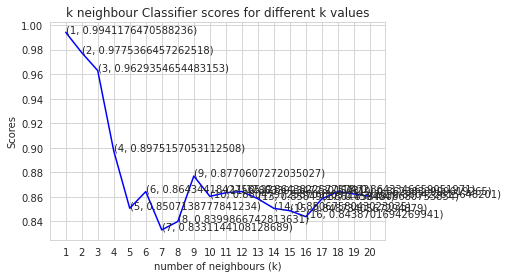

In [21]:
plt.plot([k for k in range(1,21)], knn_scores, color='blue')
for i in range(1,21):
  plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('number of neighbours (k)')
plt.ylabel('Scores')
plt.title('k neighbour Classifier scores for different k values')


In [24]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score= cross_val_score(knn_classifier, x ,y, cv=10)
knn_scores.append(score.mean())

In [26]:
knn_scores

[0.9941176470588236,
 0.9775366457262518,
 0.9629354654483153,
 0.8975157053112508,
 0.8507138777841234,
 0.8643441842756522,
 0.8331144108128689,
 0.8399866742813631,
 0.8770607272035027,
 0.8604797258709309,
 0.8633923472301543,
 0.864382257757472,
 0.8584903864458404,
 0.8506758043023035,
 0.8487340567294879,
 0.8438701694269941,
 0.8584808680753854,
 0.8643346659051971,
 0.8623833999619265,
 0.860422615648201,
 0.864382257757472]

In [28]:
score.mean()

0.864382257757472

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score= cross_val_score(randomforest_classifier, x, y, cv=10)

In [32]:
score.mean()

0.9960879497430041